# Olympic games medals analysis


In this notebook we will analyze `olimpic_medals.csv` dataset for pandas skill training.



<sub><sup>Homework for EPAM Training Center, Nizhny Novgorod, Russia, 2020</sup></sub>

### First install useful libs and make imports

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from iso3166 import countries

from codes_mapping import ioc2iso

### Then load dataset and take quick look at data

In [3]:
dset = pd.read_csv('olimpic_medals.csv')
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [4]:
dset.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


### Define some useful functions

In [5]:
def get_country_name(alpha3code: str) -> str:
    """Map codes between IOC and ISO formats according to Wikipedia article
    (https://en.wikipedia.org/wiki/Comparison_of_alphabetic_country_codes), exclude 
    former countries and former country names. Return regular country name (from ISO-3166).   
    
    Args:
      alpha3code: three-letter country code
      
    Returns:
      regular country name"""
    
    try:
        return countries.get(ioc2iso.get(alpha3code, alpha3code)).name
    
    except KeyError:
        return alpha3code

### Analysis

#### 1. How many medals did Jesse Owens get in 1936 year?

Since athlete names are stored as pair of "family name / first name", let's switch name and family name in condition. Thus we are searching 'OWENS, Jesse' now. 
However usually is better to normalize strings to lowercase when searching, that's what we do.

In [6]:
mask_year1936 = dset.Edition == 1936
mask_jesse = dset.Athlete.str.lower() == 'Owens, Jesse'.lower()

cnt = len(dset[(mask_year1936 & mask_jesse)])

f'Jesse Owens got {cnt} medal(s) in 1936' 

'Jesse Owens got 4 medal(s) in 1936'

#### 2. Which country has won more gold medals in Badminton (men) than others?

In [7]:
mask_medal = dset.Medal == 'Gold'
mask_gender = dset.Event_gender == 'M'
mask_badminton = dset.Discipline == 'Badminton'
 
alpha3code = dset[(mask_medal & mask_gender & mask_badminton)].NOC.value_counts().idxmax()  # country code
country_name = get_country_name(alpha3code)

f'Men of {country_name} ({alpha3code}) have won more gold medals in Badminton than others.'

'Men of Indonesia (INA) have won more gold medals in Badminton than others.'

#### 3. Which three countries have won more medals  than others from 1984 to 2008?

In [8]:
mask_years = dset.Edition >= 1984
top3 = dset[mask_years].groupby('NOC').count().sort_values(by='Medal', ascending=False)['Medal'][:3]
top3.index = top3.index.map(lambda x: f'{get_country_name(x)} ({x})')

top3

NOC
United States of America (USA)    1837
Australia (AUS)                    762
Germany (GER)                      691
Name: Medal, dtype: int64

#### 4. Men who won gold medals in 100m sprint

In [9]:
mask_medal = dset.Medal == 'Gold'
mask_gender = dset.Event_gender == 'M'
mask_100m = dset.Event == '100m'

show_cols =['City', 'Edition', 'Athlete', 'NOC']
sprint_winners = dset[(mask_medal & mask_gender & mask_100m)][show_cols].sort_values(by='Edition',
                                                                                     ascending=False)

sprint_winners.NOC = sprint_winners.NOC.map(lambda x: f'{get_country_name(x)} ({x})')

sprint_winners

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",Jamaica (JAM)
25539,Athens,2004,"GATLIN, Justin",United States of America (USA)
23521,Sydney,2000,"GREENE, Maurice",United States of America (USA)
21598,Atlanta,1996,"BAILEY, Donovan",Canada (CAN)
19859,Barcelona,1992,"CHRISTIE, Linford",United Kingdom of Great Britain and Northern I...
18284,Seoul,1988,"LEWIS, Carl",United States of America (USA)
16794,Los Angeles,1984,"LEWIS, Carl",United States of America (USA)
15374,Moscow,1980,"WELLS, Allan",United Kingdom of Great Britain and Northern I...
14069,Montreal,1976,"CRAWFORD, Hasely",Trinidad and Tobago (TRI)
12902,Munich,1972,"BORZOV, Valery",URS (URS)


#### 5.1 How many medals did men and women win? 

In [10]:
mask_gender_m = dset.Gender == 'Men'
mask_gender_w = dset.Gender == 'Women'

print(f'Men won {len(dset[mask_gender_m])} medals\nWomen won {len(dset[mask_gender_w])} medals')

Men won 21721 medals
Women won 7495 medals


#### 5.2 How many gold, silver and bronze medals have won each gender?

In [11]:
medal_distribution = dset.groupby(['Gender', 'Medal'])['Medal'].agg('count')
medal_distribution

Gender  Medal 
Men     Bronze    7175
        Gold      7365
        Silver    7181
Women   Bronze    2514
        Gold      2485
        Silver    2496
Name: Medal, dtype: int64

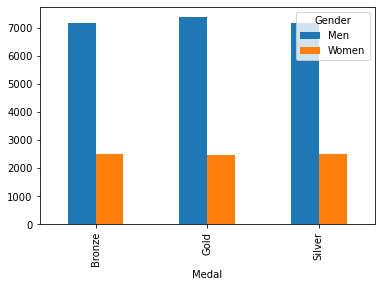

In [12]:
pd.crosstab(dset.Medal, dset.Gender).plot.bar()

#### 6. Count of medals on each Olympics

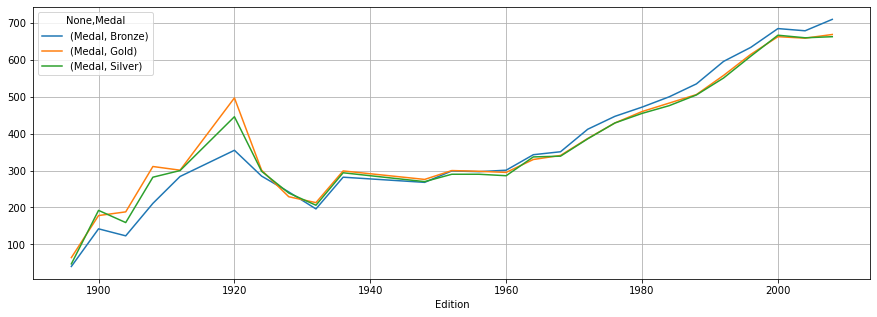

In [13]:
dset.groupby(['Edition', 'Medal']).agg({'Medal': 'count'}).unstack().plot(figsize=(15,5), grid=True)

#### 7. Count of medals by countries

In [14]:
pd.set_option('display.max_rows', len(set(dset.NOC)))

dset['Country_name'] = dset['NOC'].map(lambda x: f'{get_country_name(x)} ({x})')

dset.groupby('Country_name').agg({'Medal': 'count', 'Edition': ['min', 'max']})

Medal Edition      
                                                   count     min   max
Country_name                                                          
AHO (AHO)                                              1    1988  1988
ANZ (ANZ)                                             29    1908  1912
Afghanistan (AFG)                                      1    2008  2008
Algeria (ALG)                                         14    1984  2008
Argentina (ARG)                                      239    1924  2008
Armenia (ARM)                                          9    1996  2008
Australia (AUS)                                     1075    1896  2008
Austria (AUT)                                        146    1896  2008
Azerbaijan (AZE)                                      16    1996  2008
BOH (BOH)                                              7    1900  1908
BWI (BWI)                                              5    1960  1960
Bahamas (BAH)                                         23    1956  2008
Barbados (BAR)                                         1    2000  2000
Belarus (BLR)                                         92    1996  2008
Belgium (BEL)                                        408    1900  2008
Bermuda (BER)                                          1    1976  1976
Brazil (BRA)                                         372    1920  2008
Bulgaria (BUL)                                       331    1952  2008
Burundi (BDI)                                          1    1996  1996
Cameroon (CMR)                                        22    1968  2008
Canada (CAN)                                         592    1900  2008
Chile (CHI)                                           33    1928  2008
China (CHN)                                          679    1984  2008
Colombia (COL)                                        11    1972  2008
Costa Rica (CRC)                                       4    1988  2000
Croatia (CRO)                                         79    1992  2008
Cuba (CUB)                                           395    1900  2008
Czechia (CZE)                                         41    1996  2008
Côte d'Ivoire (CIV)                                    1    1984  1984
Denmark (DEN)                                        491    1896  2008
Djibouti (DJI)                                         1    1988  1988
Dominican Republic (DOM)                               4    1984  2008
EUA (EUA)                                            260    1956  1964
EUN (EUN)                                            223    1992  1992
Ecuador (ECU)                                          2    1996  2008
Egypt (EGY)                                           24    1928  2008
Eritrea (ERI)                                          1    2004  2004
Estonia (EST)                                         37    1920  2008
Ethiopia (ETH)                                        38    1960  2008
FRG (FRG)                                            490    1968  1988
Finland (FIN)                                        451    1908  2008
France (FRA)                                        1314    1896  2008
GDR (GDR)                                            825    1968  1988
Georgia (GEO)                                         18    1996  2008
Germany (GER)                                       1211    1896  2008
Ghana (GHA)                                           16    1960  1992
Greece (GRE)                                         145    1896  2008
Guyana (GUY)                                           1    1980  1980
Haiti (HAI)                                            8    1924  1928
Hong Kong (HKG)                                        3    1996  2004
Hungary (HUN)                                       1053    1896  2008
IOP (IOP)                                              3    1992  1992
Iceland (ISL)                                         17    1956  2008
India (IND)                                          178    1900  2008
Indo

#### 8. Athletes on 200m or 100m distances with medals in Beijing

In [15]:
mask_beijing = dset.City == 'Beijing'
mask_discipline = (dset.Event == '100m') | (dset.Event == '200m')
dset[mask_beijing & mask_discipline]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country_name
27551,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,M,Bronze,United States of America (USA)
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold,Jamaica (JAM)
27553,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,M,Silver,Trinidad and Tobago (TRI)
27554,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,W,Gold,Jamaica (JAM)
27555,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,W,Silver,Jamaica (JAM)
27556,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,100m,W,Silver,Jamaica (JAM)
27569,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,200m,M,Bronze,United States of America (USA)
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold,Jamaica (JAM)
27571,Beijing,2008,Athletics,Athletics,"CRAWFORD, Shawn",USA,Men,200m,M,Silver,United States of America (USA)
27572,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,200m,W,Bronze,Jamaica (JAM)


#### 9. USA gold medals for men and women in Athletics

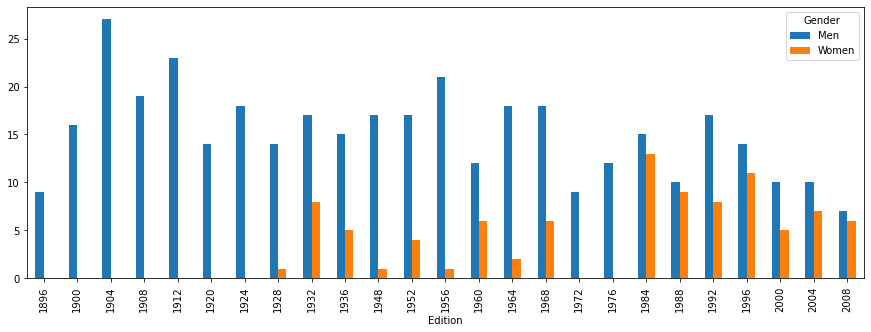

In [16]:
mask_athletics = dset.Discipline == 'Athletics'
mask_medal = dset.Medal == 'Gold'
mask_usa = dset.NOC == 'USA'
mask = mask_athletics & mask_medal & mask_usa

pd.crosstab(dset[mask].Edition, dset[mask].Gender).plot.bar(figsize=(15,5))

#### 10. Top 5 athletes by gold medal count

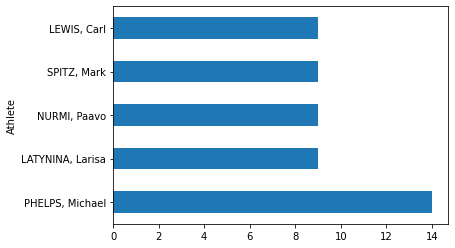

In [17]:
dset[dset.Medal == 'Gold'].groupby('Athlete').agg('count')['Medal'].sort_values(ascending=False)[:5].plot(kind='barh')

#### 11. Count medals on last Olympics

In [18]:
last_year = dset.Edition.max()
medal_count = dset[dset.Edition == last_year].agg('count')['Medal']

f'Total medals got in {last_year} year is {medal_count}.'

'Total medals got in 2008 year is 2042.'

#### 12. Top US athletes by years

In [19]:
us_only = dset[dset.loc[:, 'NOC'] == 'USA']

year_groups = us_only.groupby(['Edition', 'Athlete', 'Discipline']).agg('count').reset_index()

result = year_groups.loc[year_groups.groupby('Edition')['Medal'].idxmax()]
result = result.loc[:, ['Edition', 'Athlete', 'Discipline', 'Medal']]
result.columns = ['Year', 'Athlete', 'Discipline', 'Medal_count']

result

,Year,Athlete,Discipline,Medal_count
5,1896,"GARRETT, Robert",Athletics,4
14,1900,"BAXTER, Irving",Athletics,5
101,1904,"DOWNING, Burton",Cycling Track,6
369,1908,"SHEPPARD, Melvin",Athletics,3
428,1912,"OSBURN, Carl Townsend",Shooting,4
514,1920,"LEE, Willis",Shooting,7
617,1924,"EDERLE, Gertrude",Swimming,3
759,1928,"BARBUTI, Raymond James",Athletics,2
871,1932,"DIDRIKSON, Mildred",Athletics,3
1040,1936,"OWENS, Jesse",Athletics,4
